In [1]:
 #Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos\n",
import numpy as np # Cálculo numérico y el análisis de datos\n",
import seaborn as sns # Creación gráficos estadísticos\n",
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/2heart_cleveland_upload.csv')

In [5]:
#Revisión del tipo de datos 

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# Realizamos la lectura de los datos para el análisis exploratorio


Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [66]:
# Descripción de los datos
Datos.describe()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,56.103627,0.699482,2.238342,132.139896,248.181347,0.155440,1.020725,143.772021,0.383420,1.434715,0.782383,0.746114,1.005181,0.538860
std,8.571369,0.459676,0.981698,16.910183,54.396435,0.363266,0.994561,22.819487,0.487484,0.923415,0.572186,0.942513,0.965539,0.499784
min,34.000000,0.000000,0.000000,100.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,127.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,3.000000,130.000000,242.000000,0.000000,2.000000,146.000000,0.000000,1.200000,1.000000,0.000000,1.000000,1.000000
75%,62.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,161.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,194.000000,1.000000,3.800000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

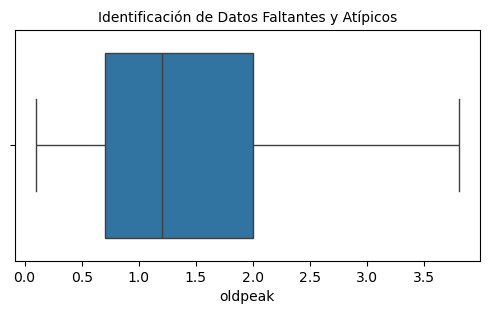

In [62]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

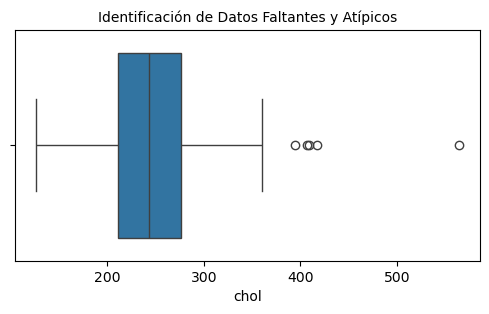

In [13]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

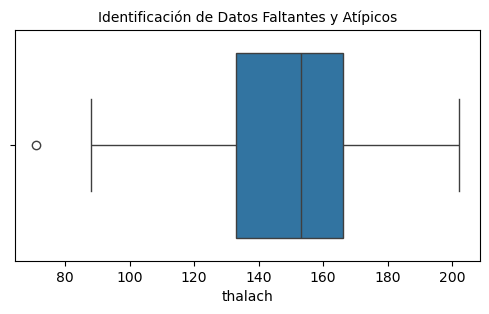

In [15]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

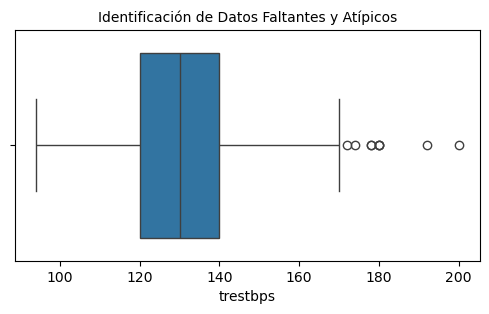

In [17]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [36]:
#2. Procesar los datos limpiándolos, tratando valores faltantes y transformándols según sea necesario

# Revisión de datos faltantes se determinan que no hay datos faltantes se validan cada una de las columnas, por tal motivo solo se realiza la consulta y no se puede quitar los 0 debido a que son de vital importancia como lo son en sex: 0 = Femenino, 1 = Masculino, igual en el caso de cp, fbs, restecg, exang, slope, ca, etcétera. 
print(Datos.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

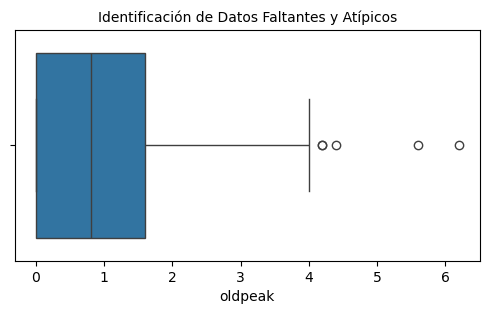

In [21]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [23]:
#conteo de datos Atípicos Depresión ST 

nivel_minimo=0
nivel_maximo=4
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [25]:
# Filtra Datos Atípicos para no utlilizarlos 

Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]

In [27]:
# Validar si se removieron los datos atípicos
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [54]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        193 non-null    int64  
 1   sex        193 non-null    int64  
 2   cp         193 non-null    int64  
 3   trestbps   193 non-null    int64  
 4   chol       193 non-null    int64  
 5   fbs        193 non-null    int64  
 6   restecg    193 non-null    int64  
 7   thalach    193 non-null    int64  
 8   exang      193 non-null    int64  
 9   oldpeak    193 non-null    float64
 10  slope      193 non-null    int64  
 11  ca         193 non-null    int64  
 12  thal       193 non-null    int64  
 13  condition  193 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.6 KB


In [56]:

# 3 seleccionar las caracteristicas Más relevantes para entrenar el modelo utilizado

#	condition: Presencia de enfermedad cardíaca (variable objetivo):
#  0: No hay enfermedad cardíaca 1: Hay enfermedad cardíaca







In [58]:
#Total de personas con enfermedad cardíaca
Datos['condition'].value_counts()

condition
1    104
0     89
Name: count, dtype: int64

In [72]:
Datos[['condition']].head(15)
#ver la distribución de los datos para ver si tiene una enfermedad cardiaca o no

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
10,1


In [74]:


#4. Dividir el dataset en Train y Test para evalaur correctamente el modelo

In [76]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
    
# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [78]:
print (X_train)
#con enfermedad cardiaca

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
76    68    1   2       180   274    1        2      150      1      1.6   
294   35    1   3       120   198    0        0      130      1      1.6   
142   43    0   2       122   213    0        0      165      0      0.2   
38    56    1   1       120   236    0        0      178      0      0.8   
28    62    1   1       120   281    0        2      103      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
121   51    0   2       140   308    0        2      142      0      1.5   
107   54    1   2       125   273    0        2      152      0      0.5   
160   67    1   3       160   286    0        2      108      1      1.5   
251   53    0   3       130   264    0        2      143      0      0.4   
243   55    0   3       128   205    0        1      130      1      2.0   

     slope  ca  thal  
76       1   0     2  
294      1   0     2  
142      1   0    

In [80]:
print (Y_train)
#Sin enfermedad cardiaca

76     1
294    1
142    0
38     0
28     1
      ..
121    0
107    0
160    1
251    0
243    1
Name: condition, Length: 144, dtype: int64


In [82]:

# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [84]:
# Construir el modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train) #que lo entrene el modelo

# Crea el modelo de prediccion, predice predict test
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación
   

In [86]:
print (Y_test)

166    0
270    1
176    0
106    1
275    0
181    1
117    0
156    0
111    0
103    1
153    0
119    0
128    1
287    0
204    1
47     0
238    1
16     0
194    1
172    0
10     1
92     0
167    1
183    1
170    1
97     0
64     0
214    1
230    1
189    1
20     0
138    0
116    0
225    1
49     0
12     1
188    0
285    0
288    1
192    1
206    1
74     1
284    0
267    1
291    1
168    1
3      1
104    0
222    1
Name: condition, dtype: int64


In [88]:
print (Prediccion)
#Imprime las predicciones

[0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 1 1 0 0 0 0]


In [90]:

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

#me indica que tan bien quedo el modelo



In [94]:
# Desempeño del modelo de regresión
#0: 0.76 para los no hay enfermedad cardíaca       1: Hay enfermedad cardíaca con 0.83

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.83      0.77      0.80        26

    accuracy                           0.80        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



In [96]:
## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo"



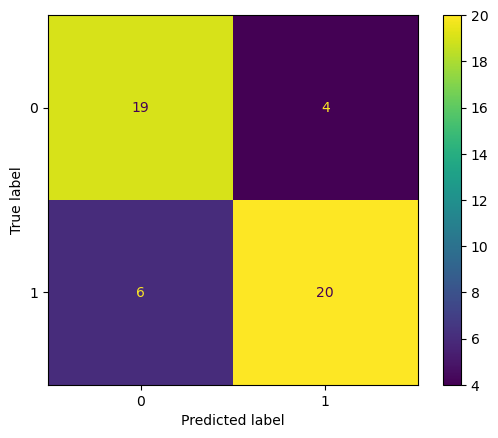

In [100]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# 0: no hay enfermedad cardíaca el modelo acerto en 19 veces en que una persona no tenia enfermedad cardíaca 
#pero el  modelo erro 6 veces 

#1: hay enfermedad cardíaca el modleo dijo 20 tenian la enfermedad y el modelo erro dijo que 4 tenian enfermedad cardiaca pero no tenian



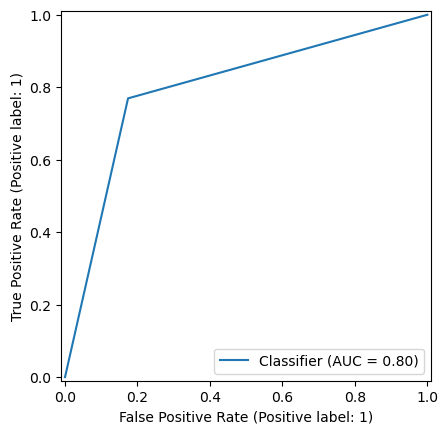

In [102]:
#Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()